# mencari keyword



In [ ]:
pip install PyMuPDF nltk networkx scipy matplotlib arxiv

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=46e54cea63a2f351f92776215fee8b8f20df849357322787fc3519e44e30ebe7
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


## Download Papernya



In [ ]:
import arxiv
import fitz # PyMuPDF

# Initialize the arXiv client
client = arxiv.Client()

# Define your search query using the ArXiv ID of the paper identified from text extraction
search_query = "2310.04406" # 'From Local to Global: A GraphRAG Approach to Query-Focused Summarization'

# Search for the paper
search = arxiv.Search(id_list=[search_query])
results = list(client.results(search))

if results:
    paper = results[0]
    arxiv_id = paper.entry_id.split('/')[-1] # Extracting the ID part
    abstract = paper.summary
else:
    arxiv_id = "N/A"
    abstract = "Paper not found."

print(f"ArXiv ID: {arxiv_id}")
print(f"Abstract: {abstract[:500]}...")

ArXiv ID: 2310.04406v3
Abstract: While language models (LMs) have shown potential across a range of decision-making tasks, their reliance on simple acting processes limits their broad deployment as autonomous agents. In this paper, we introduce Language Agent Tree Search (LATS) -- the first general framework that synergizes the capabilities of LMs in reasoning, acting, and planning. By leveraging the in-context learning ability of LMs, we integrate Monte Carlo Tree Search into LATS to enable LMs as agents, along with LM-powered...


## memecah paper per kalimat

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
import fitz # Import fitz for PDF processing

# Download necessary NLTK data if not already downloaded
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Added to download the missing resource

# Assuming 'results' is available from a previous cell (e.g., d340ddf5)
# This logic ensures 'text' is defined within this cell's scope.
paper = results[0]
pdf_path = paper.download_pdf()
doc = fitz.open(pdf_path)
text = ''
for page in doc:
    text += page.get_text()


sentences = sent_tokenize(text)

df = pd.DataFrame(sentences, columns=['kalimat'])
df

,kalimat
0,"Language Agent Tree Search Unifies Reasoning, ..."
1,"In\nthis paper, we introduce Language Agent Tr..."
2,By leveraging the in-context\nlearning ability...
3,A key feature of our ap-\nproach is the incorp...
4,Our\nexperimental evaluation across diverse do...
...,...
848,The initial\nsearch results were not the produ...
849,"Next time, I will do search[“vegetarian bacon”..."
850,I will check that the new results will fulfill...
851,I will continue to\nrefine my searches so that...


## membersihkan kalimat

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import networkx as nx

# Ensure NLTK resources are downloaded (redundant but safe if not already done)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Get sentences from the DataFrame created in cell fo-8nFIPUcGO
# Assuming 'df' DataFrame is available from a previous cell.
sentences_from_df = df['kalimat'].tolist()
lowercase_sentences = [s.lower() for s in sentences_from_df]

# Preprocess text
processed_tokens = []
stop_words = set(stopwords.words('english'))

for sentence in lowercase_sentences:
    word_tokens = word_tokenize(sentence)
    filtered_sentence = []
    for w in word_tokens:
        # Remove punctuation and non-alphabetic tokens, and remove stopwords
        if w.isalpha() and w not in stop_words:
            filtered_sentence.append(w)
    processed_tokens.extend(filtered_sentence)

tokens = processed_tokens

print(f"Total preprocessed tokens: {len(tokens)}")
print(f"First 20 preprocessed tokens: {tokens[:20]}")

# Define window size for co-occurrence graph
window_size = 2 # Using the window_size from the kernel state

# Definition of get_cooccurrence_graph function (moved from a previous cell)
def get_cooccurrence_graph(tokens, window_size):
    G = nx.Graph()

    for i, word1 in enumerate(tokens):
        # Add word1 as a node
        if word1 not in G:
            G.add_node(word1)
        # Iterate through the window around word1
        for j in range(i + 1, min(i + 1 + window_size, len(tokens))):
            word2 = tokens[j]
            # Add word2 as a node
            if word2 not in G:
                G.add_node(word2)
            # Add or update edge weight between word1 and word2
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += 1
            else:
                G.add_edge(word1, word2, weight=1)

    print(f"Co-occurrence graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G

# Call the get_cooccurrence_graph function
cooccurrence_graph = get_cooccurrence_graph(tokens, window_size)

print(f"Co-occurrence graph created with {cooccurrence_graph.number_of_nodes()} nodes and {cooccurrence_graph.number_of_edges()} edges.")
# Added this comment to ensure re-execution and define cooccurrence_graph.

Total preprocessed tokens: 9089
First 20 preprocessed tokens: ['language', 'agent', 'tree', 'search', 'unifies', 'reasoning', 'acting', 'planning', 'language', 'models', 'andy', 'zhou', 'kai', 'yan', 'michal', 'haohan', 'wang', 'wang', 'abstract', 'language']
Co-occurrence graph built with 2667 nodes and 13185 edges.
Co-occurrence graph created with 2667 nodes and 13185 edges.


## membuat matriks co occurance

In [ ]:
import networkx as nx
import pandas as pd

# Convert the co-occurrence graph to an adjacency matrix using pandas
# This creates a DataFrame where rows and columns are words, and values are co-occurrence weights
cooccurrence_matrix = nx.to_pandas_adjacency(cooccurrence_graph, weight='weight')

print("Co-occurrence Matrix (first 10 rows and columns):")
display(cooccurrence_matrix.iloc[:, :])

Co-occurrence Matrix (first 10 rows and columns):


,language,agent,tree,search,unifies,reasoning,acting,planning,models,andy,...,buffalo,pepperoni,maple,bbq,ounces,closest,tures,invalid,broader,fulfill
language,1.0,27.0,26.0,5.0,0.0,11.0,24.0,27.0,46.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
agent,27.0,0.0,26.0,27.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
tree,26.0,26.0,1.0,37.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
search,5.0,27.0,37.0,6.0,23.0,23.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
unifies,0.0,0.0,23.0,23.0,0.0,23.0,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
closest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
invalid,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
broader,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## membuat graph

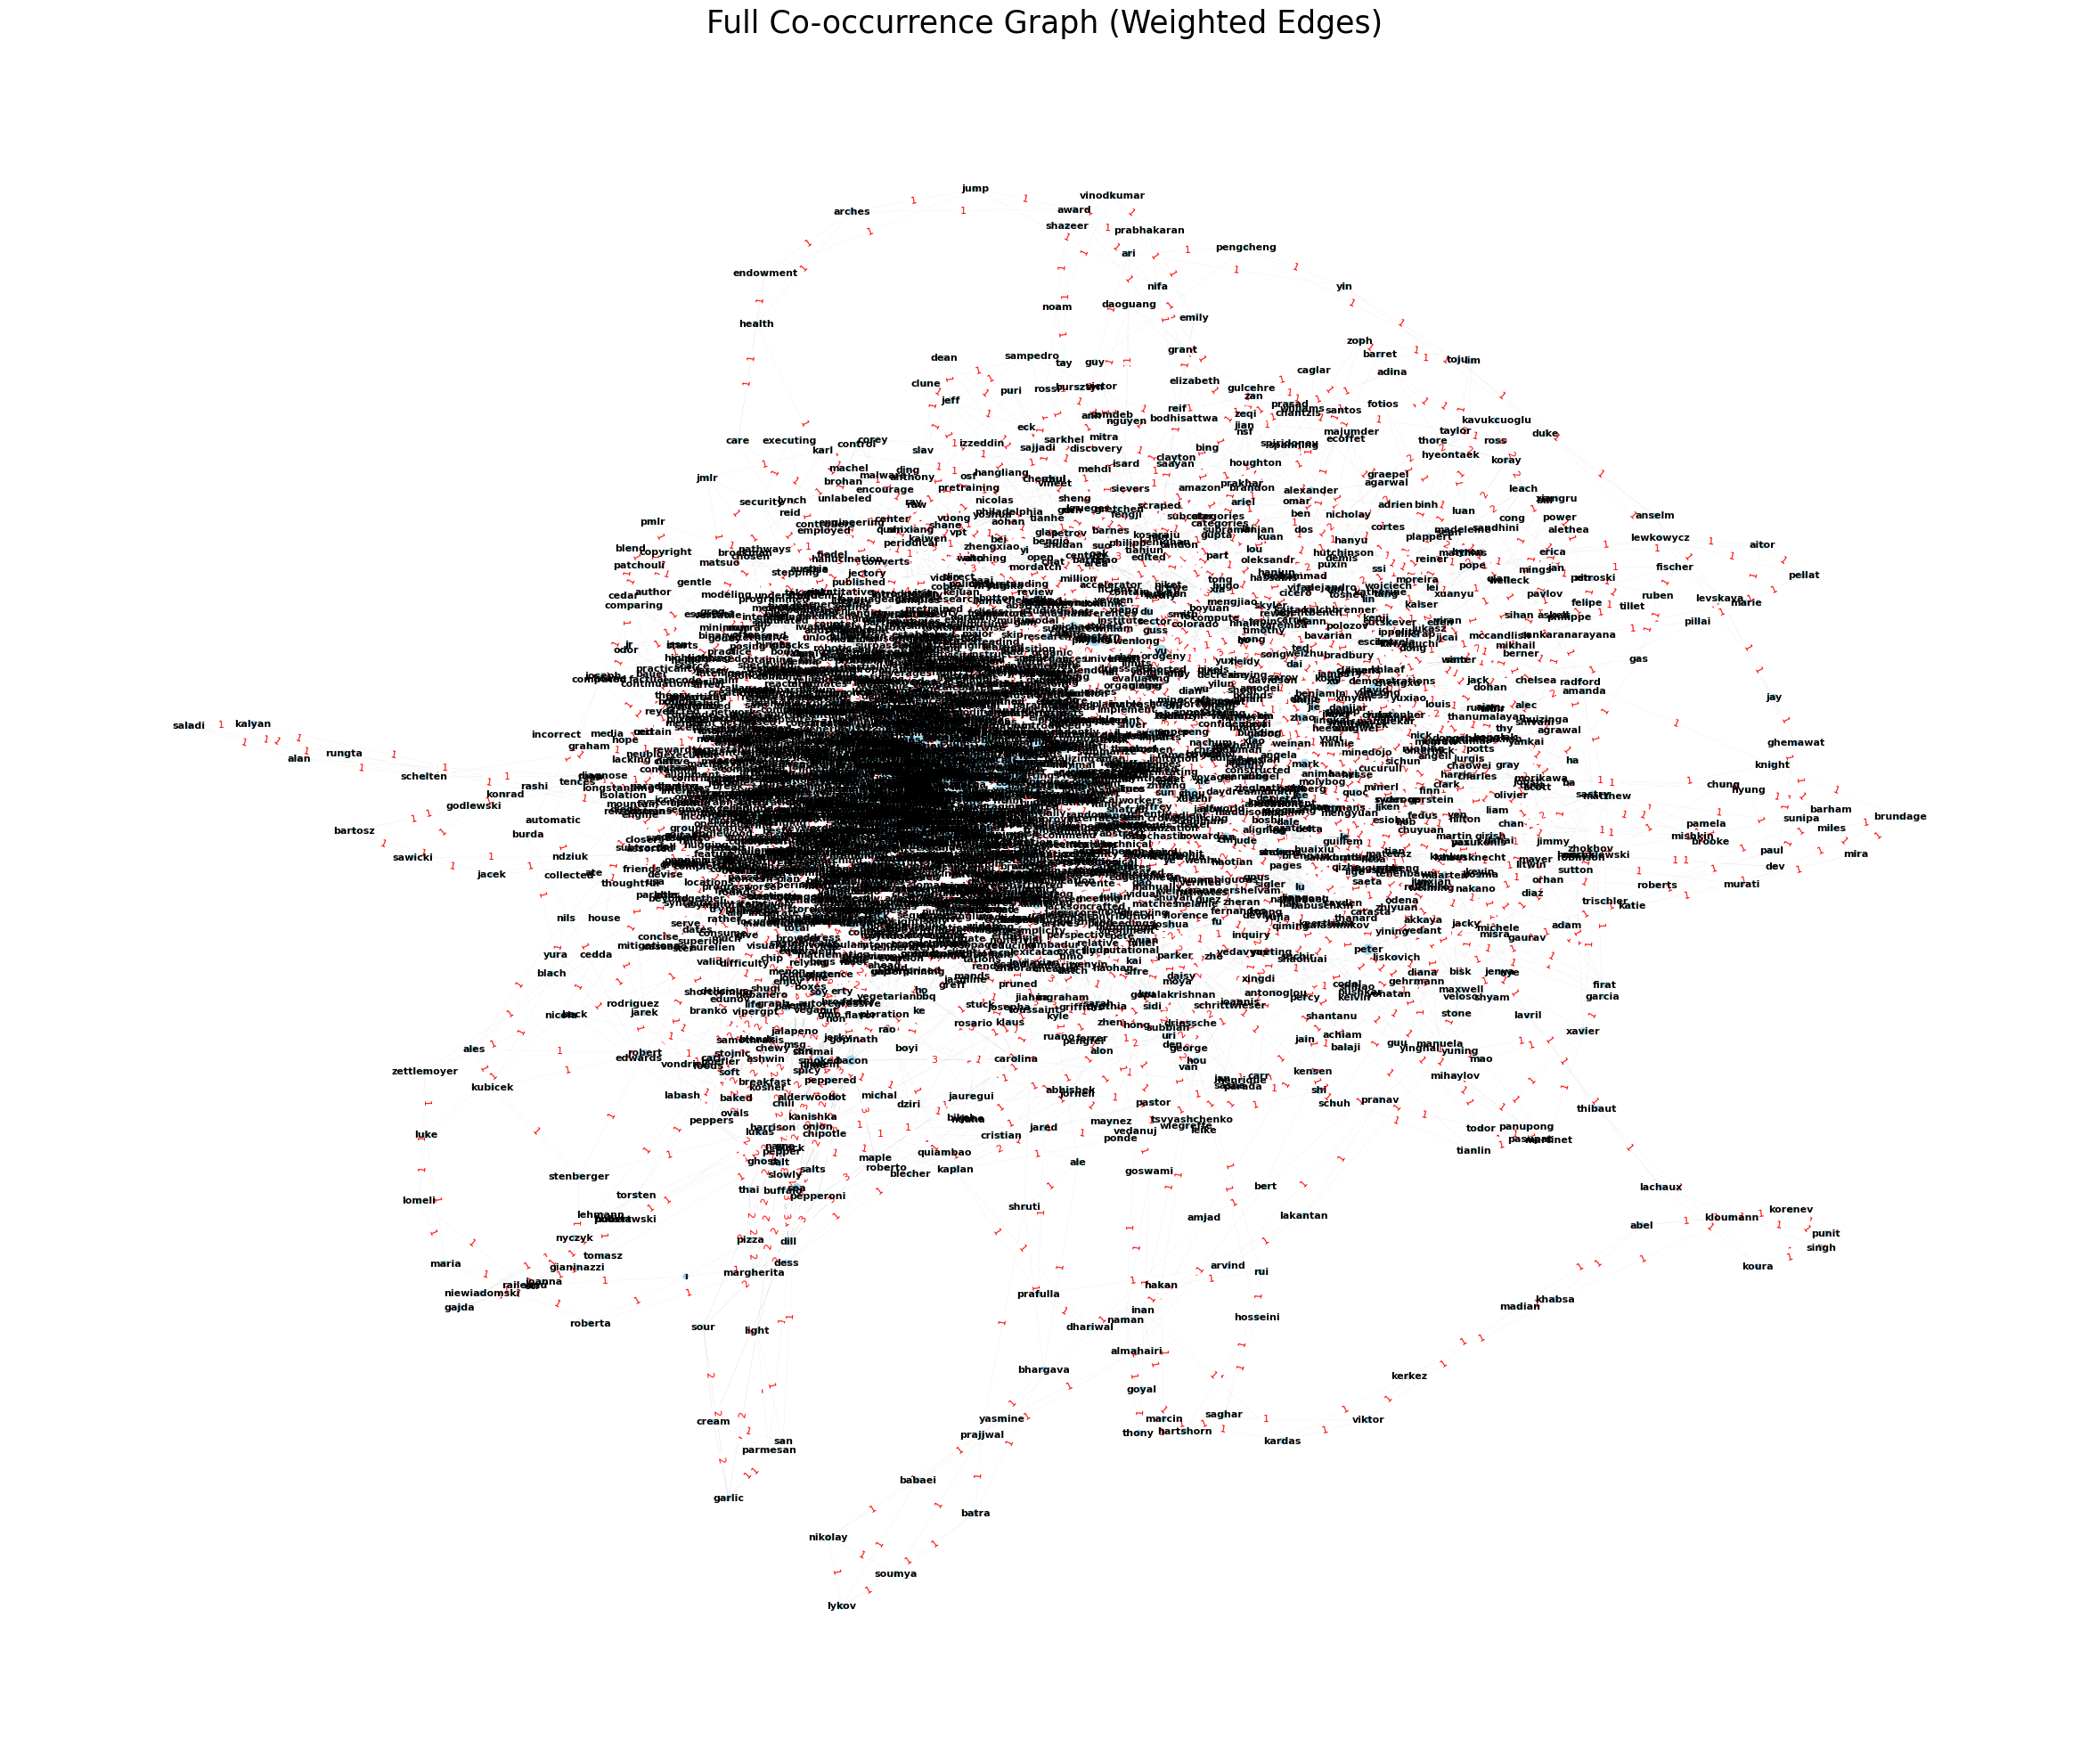

Total Edges: 13185
Edges Labeled (weight >= 1): 13185


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# --- Asumsi: cooccurrence_graph sudah didefinisikan sebelumnya ---

# 1. Hitung PageRank (sama seperti kodemu)
pagerank_scores_full = nx.pagerank(cooccurrence_graph, weight='weight')

# 2. Setup Figure
plt.figure(figsize=(30, 25))

# 3. Layout (Positioning)
# K sedikit dinaikkan agar node tidak terlalu menumpuk
pos_full = nx.spring_layout(cooccurrence_graph, k=0.15, iterations=50)

# 4. Node Sizes & Drawing Nodes
node_sizes_full = [v * 50000 for v in pagerank_scores_full.values()]
nx.draw_networkx_nodes(cooccurrence_graph, pos_full, node_size=node_sizes_full, node_color='skyblue', alpha=0.7)

# --- BAGIAN YANG DIUBAH (EDGE & LABEL) ---

# A. Menyiapkan Ketebalan Garis Berdasarkan Bobot
# Kita ambil semua bobot dari setiap edge
edges = cooccurrence_graph.edges(data=True)
weights = [data['weight'] for u, v, data in edges]

# Normalisasi ketebalan: Bobot kecil tipis, bobot besar tebal.
# Kita bagi dengan nilai tertentu atau logaritma agar garis tidak terlalu raksasa.
max_weight = max(weights) if weights else 1
edge_widths = [(w / max_weight) * 5 for w in weights] # Skala ketebalan max 5

# B. Menggambar Edge dengan ketebalan dinamis
nx.draw_networkx_edges(cooccurrence_graph, pos_full,
                       width=edge_widths, # Ketebalan sesuai bobot
                       alpha=0.4,
                       edge_color='gray')

# C. Menyiapkan Label Edge (Angka Bobot)
# PENTING: Jangan tampilkan semua jika graph sangat padat.
# Gunakan threshold. Tampilkan label HANYA jika bobot >= nilai tertentu.
label_threshold = 1 # Ubah ke angka lebih besar (misal 5) jika gambar terlalu penuh
edge_labels = {}

for u, v, data in edges:
    if data['weight'] >= label_threshold:
        edge_labels[(u, v)] = str(data['weight'])

# D. Menggambar Label Edge
nx.draw_networkx_edge_labels(cooccurrence_graph, pos_full,
                             edge_labels=edge_labels,
                             font_color='red',
                             font_size=8, # Ukuran font sedikit diperkecil agar muat
                             label_pos=0.5)

# 5. Label Node (Nama Kata)
# Opsi: Hanya tampilkan label node jika pagerank score tinggi agar tidak menumpuk
nx.draw_networkx_labels(cooccurrence_graph, pos_full, font_size=8, font_weight='bold')

plt.title('Full Co-occurrence Graph (Weighted Edges)', size=25)
plt.axis('off')
plt.show()

# --- Print Summary ---
print(f"Total Edges: {len(edges)}")
print(f"Edges Labeled (weight >= {label_threshold}): {len(edge_labels)}")

## mencari keyword atau kata penting

In [ ]:
# Calculate PageRank scores for the entire cooccurrence_graph
pagerank_scores = nx.pagerank(cooccurrence_graph, weight='weight')

# Sort nodes by PageRank score to identify top keywords
sorted_scores = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)

print("5 kata paling penting")
for word, score in sorted_scores[:5]:
    print(f"- {word}: {score:.4f}")

5 kata paling penting
- et: 0.0118
- lats: 0.0102
- search: 0.0101
- reasoning: 0.0084
- language: 0.0083
